In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [288]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 0, 2, 2, 4, 8, 6, 6, 9, 8])
z = np.array([9, 7, 8, 6, 5, 5, 3, 1, 1, 0])

In [289]:
f = lambda x, y, *k: k[0]+k[1]*x+k[2]*y
def despers(funk, arg_list, koefs):
    k = 1/(len(arg_list[0])*2) 
    summa = 0
    for i in range(len(arg_list[0])):
        summa += (funk(*arg_list[:-1, i], *koefs)-arg_list[-1, i])**2
    return k*summa

def gd_2(f, f_arg_funkLin, f_arg_data, list_koef, dx=0.01, n=5000, alfa = 0.01):
    grad = np.array([0.]*len(list_koef))
    list_koef = np.array(list_koef, dtype="float64")
    f_arg_data = np.array(f_arg_data, dtype="float64")
    for m in range(n):
        for i in range(len(list_koef)):
            koef_and_delta = np.concatenate((list_koef[:i], [list_koef[i]+dx], list_koef[i+1:]))
            grad[i] = alfa*(f(f_arg_funkLin, f_arg_data, koef_and_delta)-f(f_arg_funkLin, f_arg_data, list_koef))/dx
        list_koef -= grad
    return list_koef

In [290]:
print("{0[0]:.2f} {0[1]:.2f} {0[2]:.2f}".format(gd_2(despers, f, [x, y, z], [0, 0, 0])))

9.06 -1.35 0.33


In [295]:
def lr(f, *data_list):
    koefs = gd_2(despers, f, data_list, [0]*len(data_list))
    def funk(*coord):
        res = koefs[0]
        for i in range(len(koefs)-1):
            res += koefs[i+1]*coord[i]
        return res
    return funk



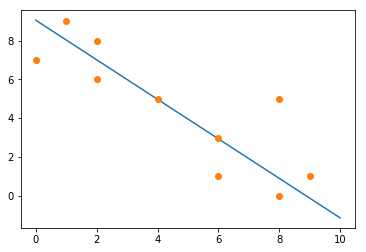

In [296]:
funk = lr(f, x, y, z)
x_pic = np.linspace(0, 10,100)
y_pic = np.linspace(0, 10,100)
z_pic = list(map(funk, x_pic, y_pic))
plt.plot(y_pic, z_pic)
plt.plot(y, z, 'o')

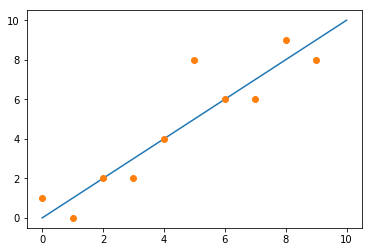

In [297]:
plt.plot(x_pic, y_pic)
plt.plot(x, y, 'o')

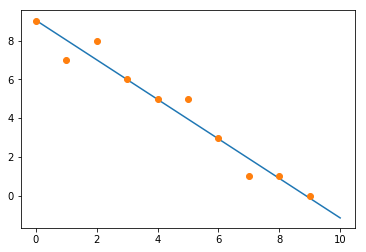

In [298]:
plt.plot(x_pic, z_pic)
plt.plot(x, z, 'o')